In [1]:
# ! pip install optbinning -q
# ! pip install scikit-optimize -q

In [2]:
import pandas as pd 
import numpy as np 
import openpyxl
import itertools
import pandas as pd
from optbinning import OptimalBinning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

(CVXPY) Dec 24 09:58:01 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Dec 24 09:58:01 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
pd.set_option('display.max_rows', None)    # Show all rows
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_colwidth', None) 

In [4]:
from IPython.core.display import display, HTML

display(HTML("""<style>.container { width: 85% !important; }.code_cell .input_area {width: 100% !important;}.text_cell .input_area {width: 100% !important;}</style>"""))

C:\Users\itsht\AppData\Local\Temp\ipykernel_15448\3107909254.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Data Path

In [5]:
data_path = ".\Principal Data Scientist Project Materials\property_features.csv"

In [6]:
# Load the Excel file
df_test = pd.read_csv(data_path, nrows =100)

# Display all sheet names
print(df_test.shape)

(100, 12)


In [7]:
df_test.head()

,property_id,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,property_value
0,4184830,4,3.5,8,2332,4509,1913.0,2018-06-25,592373,2015-06-25,468706.0,749008
1,5411541,1,1.0,3,499,5893,1934.0,2019-01-02,102451,2014-01-02,NaN,214818
2,7023848,1,1.5,4,666,2134,1909.0,2021-05-06,197263,2020-05-06,NaN,269522
3,11444575,3,3.0,8,1687,11655,1953.0,2012-01-16,688888,2010-01-16,218163.0,874366
4,15540349,2,2.5,5,1064,4783,1926.0,2018-09-21,432320,2017-09-21,NaN,577160


In [8]:
df_test.dtypes.value_counts(dropna=False)

int64      7
float64    3
object     2
Name: count, dtype: int64

In [9]:
string_columns = df_test.select_dtypes(include=['int64', 'float']).columns
string_columns

Index(['property_id', 'bedrooms', 'bathrooms', 'rooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'lastSaleAmount', 'priorSaleAmount',
       'property_value'],
      dtype='object')

In [10]:
# Load the Excel file
df_test2 = pd.read_csv(data_path, usecols = string_columns)

# Display all sheet names
print(df_test2.shape)

(500000, 10)


In [11]:
df_test2.head()

,property_id,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,property_value
0,4184830,4,3.5,8,2332,4509,1913.0,592373,468706.0,749008
1,5411541,1,1.0,3,499,5893,1934.0,102451,NaN,214818
2,7023848,1,1.5,4,666,2134,1909.0,197263,NaN,269522
3,11444575,3,3.0,8,1687,11655,1953.0,688888,218163.0,874366
4,15540349,2,2.5,5,1064,4783,1926.0,432320,NaN,577160


In [12]:
# Load the Excel file
df = pd.read_csv(data_path)

# Display all sheet names
print(df.shape)

(500000, 12)


## Brief Data EDA

In [13]:
df.head()

,property_id,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,property_value
0,4184830,4,3.5,8,2332,4509,1913.0,2018-06-25,592373,2015-06-25,468706.0,749008
1,5411541,1,1.0,3,499,5893,1934.0,2019-01-02,102451,2014-01-02,NaN,214818
2,7023848,1,1.5,4,666,2134,1909.0,2021-05-06,197263,2020-05-06,NaN,269522
3,11444575,3,3.0,8,1687,11655,1953.0,2012-01-16,688888,2010-01-16,218163.0,874366
4,15540349,2,2.5,5,1064,4783,1926.0,2018-09-21,432320,2017-09-21,NaN,577160


In [14]:
df.dtypes.value_counts(dropna=False)

int64      7
float64    3
object     2
Name: count, dtype: int64

In [15]:
string_columns = df.select_dtypes(include=['object', 'string']).columns
string_columns

Index(['lastSaleDate', 'priorSaleDate'], dtype='object')

In [16]:
df[string_columns].dtypes

lastSaleDate     object
priorSaleDate    object
dtype: object

In [17]:
df.isnull().sum()

property_id             0
bedrooms                0
bathrooms               0
rooms                   0
squareFootage           0
lotSize                 0
yearBuilt              34
lastSaleDate            0
lastSaleAmount          0
priorSaleDate           0
priorSaleAmount    124018
property_value          0
dtype: int64

In [18]:
df['yearBuilt'].fillna(df['yearBuilt'].mean(), inplace=True)

In [19]:
df.isnull().sum()

property_id             0
bedrooms                0
bathrooms               0
rooms                   0
squareFootage           0
lotSize                 0
yearBuilt               0
lastSaleDate            0
lastSaleAmount          0
priorSaleDate           0
priorSaleAmount    124018
property_value          0
dtype: int64

In [20]:
percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]

In [21]:
df.describe(percentiles=percentiles)

,property_id,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,property_value
count,5.000000e+05,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,5.000000e+05,3.759820e+05,5.000000e+05
mean,8.384578e+06,2.709516,2.696325,6.164264,1538.430636,5828.886754,1929.428059,4.063502e+05,2.874225e+05,6.426337e+05
std,4.844043e+06,0.906102,1.097047,1.819715,746.402166,2163.145921,29.542472,2.987327e+05,1.870809e+05,3.386571e+05
min,5.000000e+00,0.000000,0.500000,1.000000,353.000000,623.000000,1874.000000,2.590000e+02,8.010000e+02,1.481950e+05
1%,1.644640e+05,1.000000,1.000000,3.000000,484.000000,2039.000000,1881.000000,2.374097e+04,2.784981e+04,1.894370e+05
10%,1.668333e+06,2.000000,1.500000,4.000000,736.000000,3297.000000,1894.000000,9.919500e+04,8.745710e+04,2.872509e+05
25%,4.192443e+06,2.000000,2.000000,5.000000,989.000000,4258.000000,1907.000000,1.870930e+05,1.496360e+05,3.933070e+05
50%,8.383911e+06,3.000000,2.500000,6.000000,1385.000000,5552.000000,1925.000000,3.368650e+05,2.481250e+05,5.679145e+05
75%,1.257875e+07,3.000000,3.500000,7.000000,1925.000000,7100.000000,1948.000000,5.506742e+05,3.833848e+05,8.120762e+05
90%,1.509690e+07,4.000000,4.000000,9.000000,2540.000000,8718.000000,1971.000000,8.053916e+05,5.385977e+05,1.095107e+06


In [22]:
df['lastSaleDate'].max()

'2023-07-20'

In [23]:
df.loc[df['lastSaleDate']>'2023-06-01'].shape

(2197, 12)

In [24]:
df.loc[df['lastSaleDate']>'2023-06-01'].tail()

,property_id,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,property_value
499095,1148718,3,2.5,5,1310,5723,2016.0,2023-07-03,496878,2017-07-03,415391.0,394854
499703,8929686,3,2.5,7,1137,4320,1919.0,2023-06-04,525378,2021-06-04,253499.0,449269
499743,16057959,3,2.0,6,970,4963,1951.0,2023-06-27,417600,2022-06-27,180249.0,403007
499798,12493927,2,1.5,3,730,2933,1959.0,2023-06-20,342644,2023-06-20,431382.0,355658
499914,13623454,2,1.0,4,611,2575,1904.0,2023-06-23,174615,2021-06-23,NaN,226750


In [25]:
df.dtypes

property_id          int64
bedrooms             int64
bathrooms          float64
rooms                int64
squareFootage        int64
lotSize              int64
yearBuilt          float64
lastSaleDate        object
lastSaleAmount       int64
priorSaleDate       object
priorSaleAmount    float64
property_value       int64
dtype: object

In [26]:
df['lastSaleDate'].iloc[0]

'2018-06-25'

In [27]:
df['year_extract'] = df['lastSaleDate'].str[:4]  # First 4 characters for year
df['month_extract'] = df['lastSaleDate'].str[5:7]  # Characters at index 5-6 for month
df['day_extract'] = df['lastSaleDate'].str[8:10]  # Characters at index 8-9 for day


In [28]:
df['year_extract'].value_counts(dropna=False)

year_extract
2017    36305
2016    33874
2018    32740
2015    30608
2019    28451
2014    28288
2013    26439
2012    24682
2020    23711
2011    23198
2010    22199
2009    20926
2008    19795
2021    18952
2007    18566
2006    17305
2005    16056
2004    14886
2022    13132
2003    12704
2002    10345
2001     8073
2023     6215
2000     5824
1999     3887
1998     2129
1997      710
Name: count, dtype: int64

In [29]:
df['last_sale_dt'] =  pd.to_datetime(df['lastSaleDate'], format='%Y-%m-%d')

In [30]:
df['last_sale_year'] = df['last_sale_dt'].dt.year
df['last_sale_month'] = df['last_sale_dt'].dt.month

In [31]:
def plot_median_by_bins(df, column_a, column_b, num_bins=10):
    df['bin'] = pd.cut(df[column_b], bins=num_bins)
    median_by_bin = df.groupby('bin')[column_a].median().reset_index()
    
    bin_labels = median_by_bin['bin'].astype(str)
    medians = median_by_bin[column_a]
    
    plt.figure(figsize=(8, 6))
    plt.plot(bin_labels, medians, marker='o', linestyle='-')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(f'Binned {column_b}')
    plt.ylabel(f'Median of {column_a}')
    plt.title(f'Median of {column_a} by {column_b} Binned into {num_bins} Bins')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


In [32]:
print([x for x in df.columns])

['property_id', 'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'lastSaleDate', 'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'property_value', 'year_extract', 'month_extract', 'day_extract', 'last_sale_dt', 'last_sale_year', 'last_sale_month']


In [33]:
df['bedrooms'].value_counts(dropna=False)

bedrooms
3    193183
2    191677
4     70382
1     28894
5     13820
6      1840
7       171
0        21
8        12
Name: count, dtype: int64

In [34]:
df.groupby(['bedrooms'])['property_value'].count()/df.shape[0]

bedrooms
0    0.000042
1    0.057788
2    0.383354
3    0.386366
4    0.140764
5    0.027640
6    0.003680
7    0.000342
8    0.000024
Name: property_value, dtype: float64

In [35]:
df.groupby(['bedrooms'])['property_value'].count()/df.shape[0]*100

bedrooms
0     0.0042
1     5.7788
2    38.3354
3    38.6366
4    14.0764
5     2.7640
6     0.3680
7     0.0342
8     0.0024
Name: property_value, dtype: float64

In [36]:
df['year_extract'].value_counts(dropna=False)

year_extract
2017    36305
2016    33874
2018    32740
2015    30608
2019    28451
2014    28288
2013    26439
2012    24682
2020    23711
2011    23198
2010    22199
2009    20926
2008    19795
2021    18952
2007    18566
2006    17305
2005    16056
2004    14886
2022    13132
2003    12704
2002    10345
2001     8073
2023     6215
2000     5824
1999     3887
1998     2129
1997      710
Name: count, dtype: int64

In [37]:
df.groupby(['bedrooms'])['bedrooms'].count()

bedrooms
0        21
1     28894
2    191677
3    193183
4     70382
5     13820
6      1840
7       171
8        12
Name: bedrooms, dtype: int64

In [38]:
df.groupby(['bedrooms'])['year_extract'].nunique()

bedrooms
0    13
1    27
2    27
3    27
4    27
5    27
6    27
7    25
8    11
Name: year_extract, dtype: int64

In [39]:
df.groupby(['bedrooms'])['bedrooms'].count()/df.shape[0]*100

bedrooms
0     0.0042
1     5.7788
2    38.3354
3    38.6366
4    14.0764
5     2.7640
6     0.3680
7     0.0342
8     0.0024
Name: bedrooms, dtype: float64

In [40]:
# df.groupby(['bedrooms'])['bedrooms'].count().reset_index()

In [41]:
df.loc[df['bedrooms'].isin([0,1])].groupby(['bedrooms', 'year_extract'])['property_value'].sum()/df.groupby(['bedrooms'])['property_value'].sum()*100

bedrooms  year_extract
0         2003             3.077195
          2004             8.940138
          2008             7.779210
          2009             3.578452
          2010             4.909981
          2011            15.408724
          2012             4.436182
          2014            21.876203
          2015             4.883696
          2016             2.585694
          2018             9.570993
          2019             4.909294
          2021             8.044238
1         1997             0.119449
          1998             0.364999
          1999             0.732139
          2000             0.989774
          2001             1.602461
          2002             2.000913
          2003             2.474872
          2004             2.650559
          2005             2.824366
          2006             3.420421
          2007             3.472132
          2008             3.731990
          2009             4.111987
          2010             4.399320
     

In [42]:
df_groupby_count = df.groupby(['bedrooms', 'year_extract'])['property_value'].transform('sum')

In [43]:
len(df_groupby_count)

500000

In [59]:
sum_by_A_B = df.groupby(['bedrooms', 'year_extract'])['property_value'].sum()
sum_by_A_B

bedrooms  year_extract
0         2003                183567
          2004                533315
          2008                464061
          2009                213469
          2010                292900
          2011                919192
          2012                264636
          2014               1305003
          2015                291332
          2016                154247
          2018                570948
          2019                292859
          2021                479871
1         1997              13995812
          1998              42767002
          1999              85784831
          2000             115971958
          2001             187760464
          2002             234447180
          2003             289980933
          2004             310566183
          2005             330931214
          2006             400770987
          2007             406830039
          2008             437277568
          2009             481801898
          2010 

In [60]:
total_by_A = df.groupby('bedrooms')['property_value'].sum()
total_by_A

bedrooms
0         5965400
1     11717009143
2    102973911645
3    131799336193
4     58703906937
5     13751200380
6      2138021138
7       210176034
8        17326515
Name: property_value, dtype: int64

In [61]:
sum_by_A_B/total_by_A*100

bedrooms  year_extract
0         2003             3.077195
          2004             8.940138
          2008             7.779210
          2009             3.578452
          2010             4.909981
          2011            15.408724
          2012             4.436182
          2014            21.876203
          2015             4.883696
          2016             2.585694
          2018             9.570993
          2019             4.909294
          2021             8.044238
1         1997             0.119449
          1998             0.364999
          1999             0.732139
          2000             0.989774
          2001             1.602461
          2002             2.000913
          2003             2.474872
          2004             2.650559
          2005             2.824366
          2006             3.420421
          2007             3.472132
          2008             3.731990
          2009             4.111987
          2010             4.399320
     

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
df['property_value'].dtypes

dtype('int64')

In [49]:
df['property_value'] = df['property_value'].fillna(0)


In [50]:
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')


In [51]:
y

NameError: name 'y' is not defined

In [ ]:
X = df[['bedrooms', 'year_extract']]
y = df['property_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Add Constant for Intercept
X_train = sm.add_constant(X_train)  # Adds intercept term to the training set
X_test = sm.add_constant(X_test)    # Adds intercept term to the testing set

# Step 4: Fit the Regression Model
model = sm.OLS(y_train, X_train).fit()

# Step 5: Make Predictions on Test Data
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print Results
print("Model Summary:")
print(model.summary())
print("\nEvaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared: {r2:.4f}")

In [37]:
# Step 1: Calculate the sum of C for each A-B combination
sum_by_A_B = df.groupby(['bedrooms', 'year_extract'], as_index=False)['property_value'].sum().rename(columns={'C': 'sum_C_by_A_B'})

# Step 2: Calculate the total sum of C for each A
total_by_A = df.groupby('A', as_index=False)['C'].sum().rename(columns={'C': 'total_C_by_A'})

# Step 3: Merge the two temporary DataFrames
result = pd.merge(sum_by_A_B, total_by_A, on='A')

C:\Users\itsht\AppData\Local\Temp\ipykernel_2180\2334703933.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[target].median().reset_index()


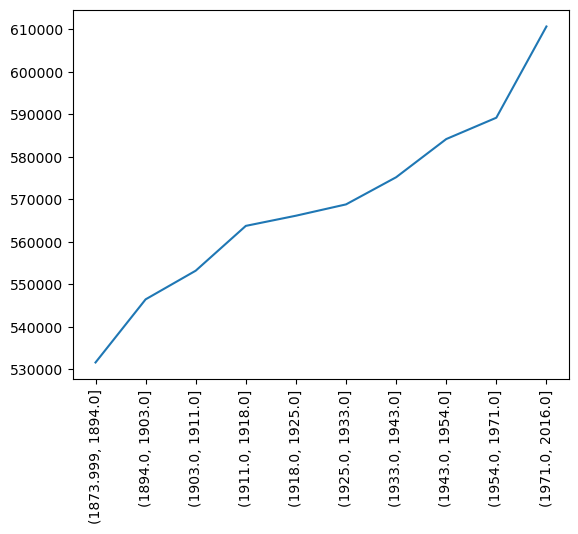

In [54]:
feature = 'yearBuilt'
target = 'property_value'

# df['bin'] = pd.cut(df[feature], bins=10)
df['bin'] = pd.qcut(df[feature], q=10)
median_by_bin = df.groupby('bin')[target].median().reset_index()
bin_labels = median_by_bin['bin'].astype(str)
medians = median_by_bin[target]

plt.plot(bin_labels, medians)
plt.xticks(rotation=90)
plt.show()

In [55]:
df.shape

(500000, 19)

In [57]:
df.head(5)

,property_id,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,property_value,year_extract,month_extract,day_extract,last_sale_dt,last_sale_year,last_sale_month,bin
0,4184830,4,3.5,8,2332,4509,1913.0,2018-06-25,592373,2015-06-25,468706.0,749008,2018,06,25,2018-06-25,2018,6,"(1911.0, 1918.0]"
1,5411541,1,1.0,3,499,5893,1934.0,2019-01-02,102451,2014-01-02,NaN,214818,2019,01,02,2019-01-02,2019,1,"(1933.0, 1943.0]"
2,7023848,1,1.5,4,666,2134,1909.0,2021-05-06,197263,2020-05-06,NaN,269522,2021,05,06,2021-05-06,2021,5,"(1903.0, 1911.0]"
3,11444575,3,3.0,8,1687,11655,1953.0,2012-01-16,688888,2010-01-16,218163.0,874366,2012,01,16,2012-01-16,2012,1,"(1943.0, 1954.0]"
4,15540349,2,2.5,5,1064,4783,1926.0,2018-09-21,432320,2017-09-21,NaN,577160,2018,09,21,2018-09-21,2018,9,"(1925.0, 1933.0]"


C:\Users\itsht\AppData\Local\Temp\ipykernel_2180\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


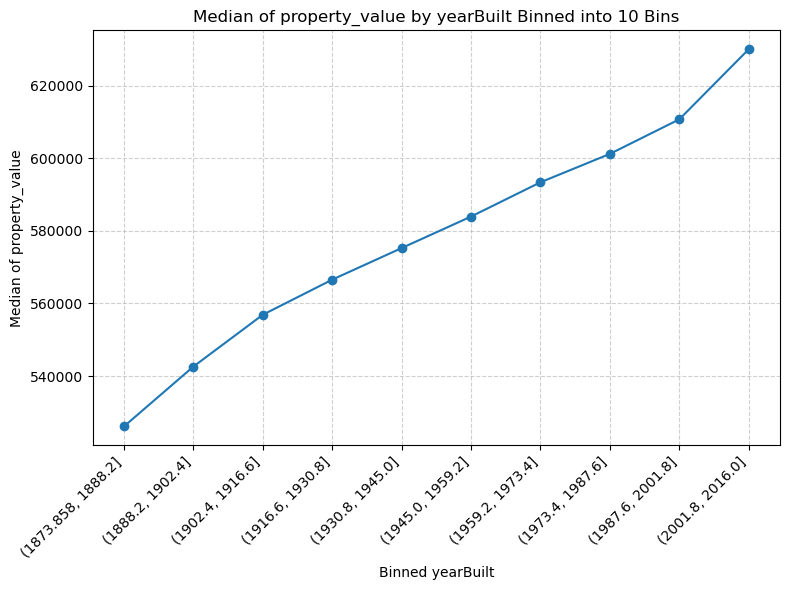

In [58]:
plot_median_by_bins(df, 'property_value', 'yearBuilt')

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


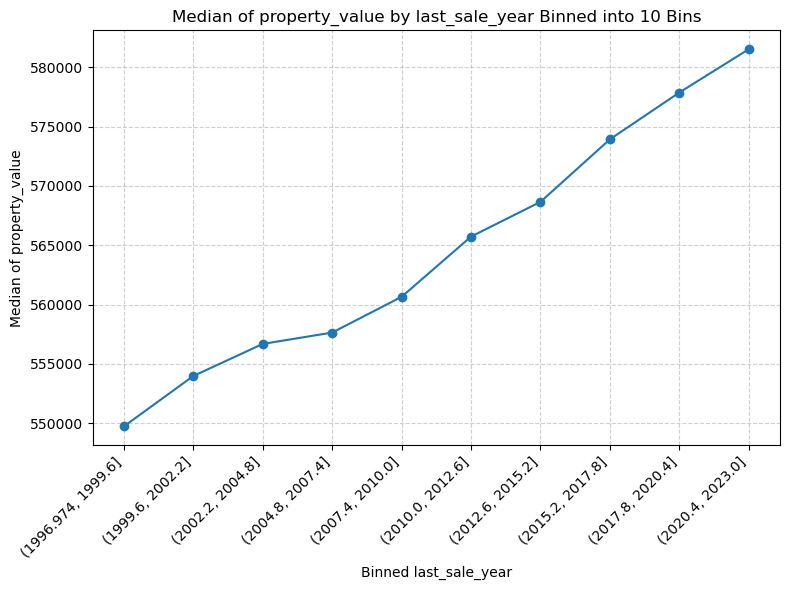

In [19]:
plot_median_by_bins(df, 'property_value', 'last_sale_year')

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


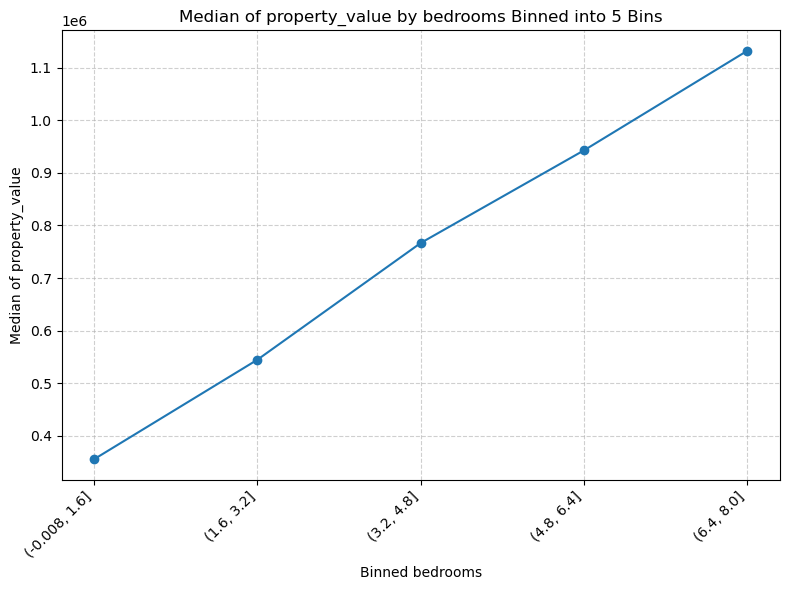

In [20]:
plot_median_by_bins(df, 'property_value', 'bedrooms', 5)

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


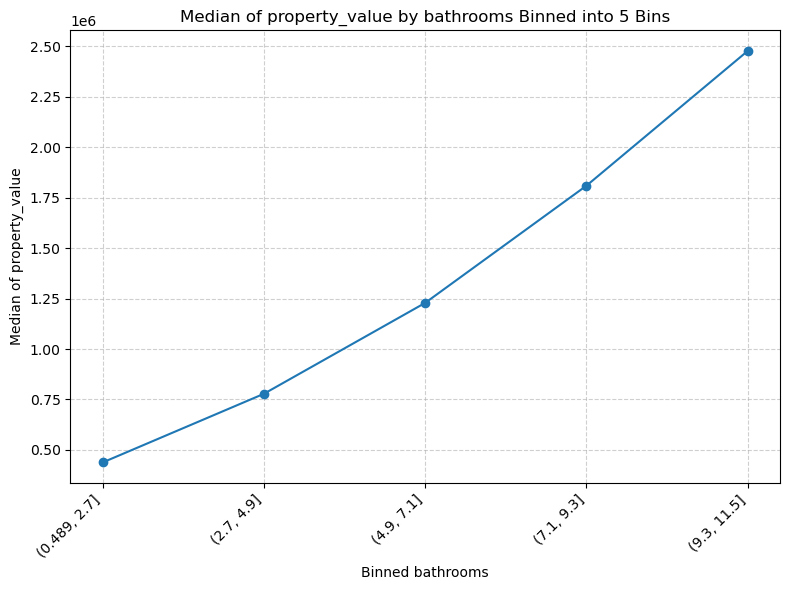

In [21]:
plot_median_by_bins(df, 'property_value', 'bathrooms', 5)

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


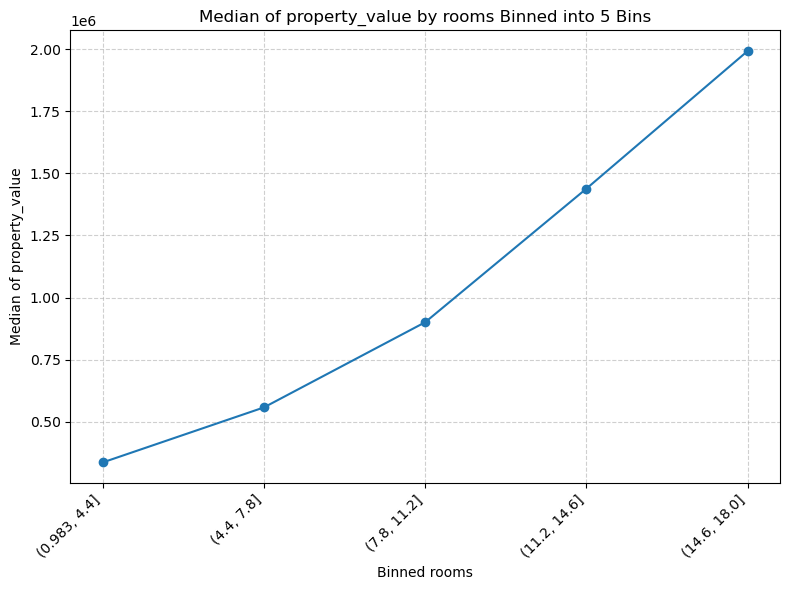

In [22]:
plot_median_by_bins(df, 'property_value', 'rooms', 5)

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


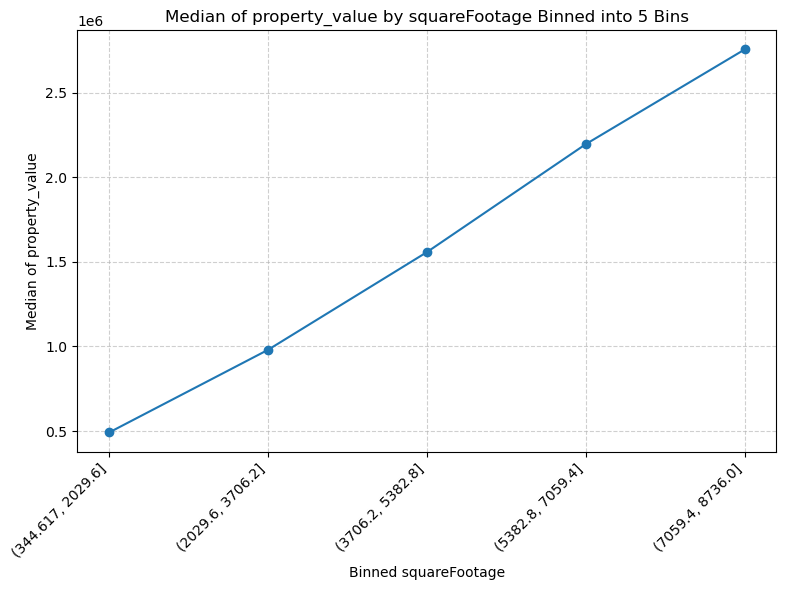

In [23]:
plot_median_by_bins(df, 'property_value', 'squareFootage', 5)

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


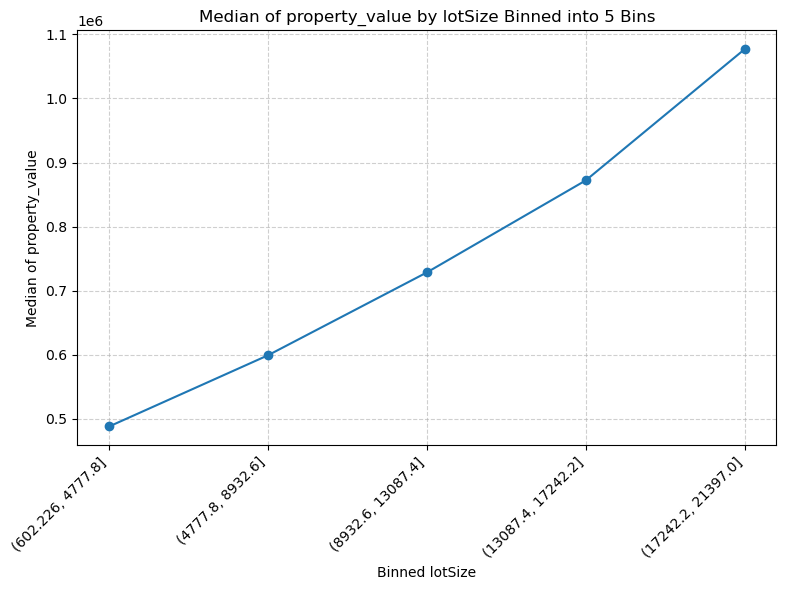

In [24]:
plot_median_by_bins(df, 'property_value', 'lotSize', 5)

In [25]:
df['as_of_today'] = '2024-11-30'
df['as_of_today_dt'] =  pd.to_datetime(df['as_of_today'], format='%Y-%m-%d')

In [26]:
df['month_delta_since_last_transaction'] = (df['as_of_today_dt'].dt.year - df['last_sale_dt'].dt.year) * 12 + (df['as_of_today_dt'].dt.month - df['last_sale_dt'].dt.month)

In [27]:
df['diff_value_last'] = df['property_value'] - df['lastSaleAmount']

In [28]:
df['ratio_value_last'] = df['property_value']/df['lastSaleAmount']

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


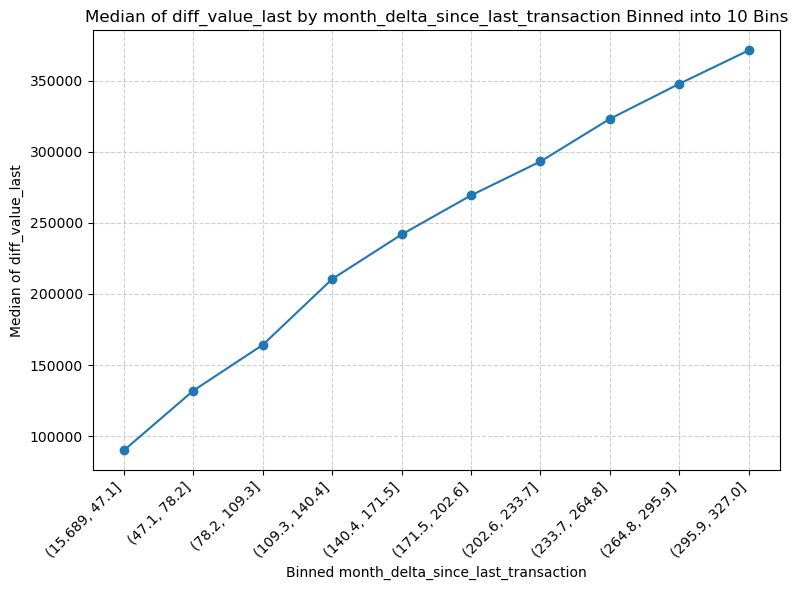

In [29]:
plot_median_by_bins(df, 'diff_value_last', 'month_delta_since_last_transaction', 10)

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\1646160185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_bin = df.groupby('bin')[column_a].median().reset_index()


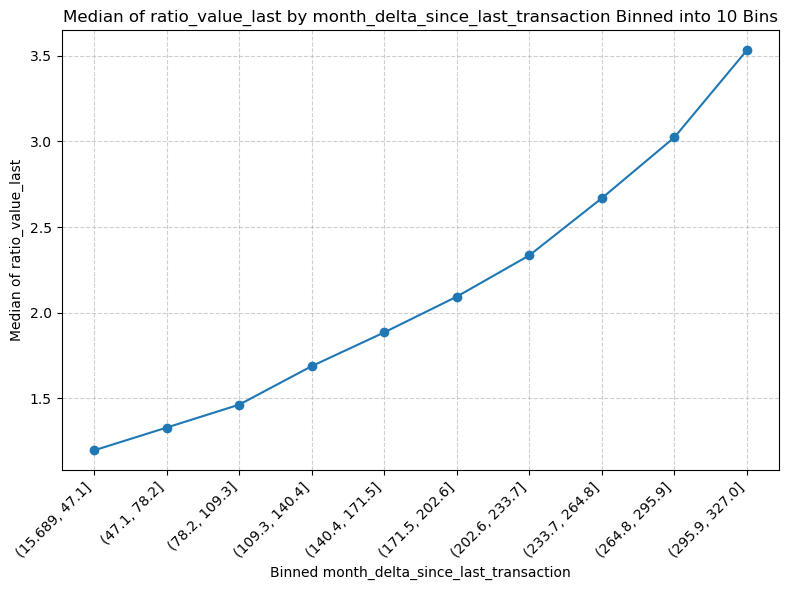

In [30]:
plot_median_by_bins(df, 'ratio_value_last', 'month_delta_since_last_transaction', 10)

In [31]:
df_modeling =  df.copy()

## Xgboost

In [32]:
from xgboost import XGBRegressor

In [33]:
target = 'property_value'

In [34]:
X = df_modeling.loc[df_modeling[target]!=-1].drop(target, axis=1)
y = df_modeling.loc[df_modeling[target]!=-1, target]

In [35]:
print([x for x in X.columns])

['property_id', 'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'lastSaleDate', 'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'last_sale_dt', 'last_sale_year', 'last_sale_month', 'bin', 'as_of_today', 'as_of_today_dt', 'month_delta_since_last_transaction', 'diff_value_last', 'ratio_value_last']


In [36]:
features =[ 'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'lastSaleAmount','last_sale_year', 'month_delta_since_last_transaction']

In [37]:
X = X[features]

In [38]:
X.shape, y.shape

((500000, 9), (500000,))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [41]:
X_train.shape, X_val.shape, X_test.shape

((300000, 9), (100000, 9), (100000, 9))

## Hypterparameter Search

In [42]:
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

In [43]:

# Define the search space
search_space = {
    'n_estimators': (100, 1000),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (4, 10),
    'alpha': (0, 1.0),  # L1 Regularization (Lasso)
    'lambda': (0, 10.0),  # L2 Regularization (Ridge)
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0)
}

# XGBoost model with early stopping
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# Bayesian search
bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=search_space,
    n_iter=10,  # Number of iterations
    cv=3,  # Cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=999,  # Seed for Bayesian search
    scoring='neg_mean_squared_error'
)

# Fit with early stopping
bayes_search.fit(
    X_train, 
    y_train,
    eval_set=[(X_val, y_val)], 
    eval_metric='mae', 
    early_stopping_rounds=20  # Early stopping criteria
)

# Print the best parameters
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[0]	validation_0-mae:250305.79818
[1]	validation_0-mae:241980.60299
[2]	validation_0-mae:232991.81828
[3]	validation_0-mae:224521.22280
[4]	validation_0-mae:216764.87740
[5]	validation_0-mae:209212.61167


C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-mae:202335.18292
[7]	validation_0-mae:196370.99376
[8]	validation_0-mae:189988.35135
[9]	validation_0-mae:183981.70197
[10]	validation_0-mae:178335.73436
[11]	validation_0-mae:173043.79038
[12]	validation_0-mae:168636.93671
[13]	validation_0-mae:163923.21396
[14]	validation_0-mae:159616.99639
[15]	validation_0-mae:155483.29187
[16]	validation_0-mae:151620.30723
[17]	validation_0-mae:148019.54353
[18]	validation_0-mae:144659.95213
[19]	validation_0-mae:141519.95758
[20]	validation_0-mae:138596.98977
[21]	validation_0-mae:136124.65158
[22]	validation_0-mae:133554.35702
[23]	validation_0-mae:131154.07165
[24]	validation_0-mae:128929.69559
[25]	validation_0-mae:126856.25630
[26]	validation_0-mae:124934.32158
[27]	validation_0-mae:123139.42270
[28]	validation_0-mae:121480.26231
[29]	validation_0-mae:119941.36120
[30]	validation_0-mae:118507.86479
[31]	validation_0-mae:117251.18244
[32]	validation_0-mae:115987.28344
[33]	validation_0-mae:114831.07199
[34]	validation_0-mae:11

In [44]:
# Print the best parameters
print("Best Parameters:", bayes_search.best_params_)
print("Best Score:", bayes_search.best_score_)

Best Parameters: OrderedDict([('alpha', 0.05839856292122393), ('colsample_bytree', 0.9366957028468262), ('lambda', 2.929905210838746), ('learning_rate', 0.04712058079004395), ('max_depth', 7), ('n_estimators', 233), ('subsample', 0.988922894867097)])
Best Score: -18258635995.872753


## Model Building

In [45]:
xgb_reg = XGBRegressor(
    objective='reg:squarederror',  # Loss function
    n_estimators=250,              # Total number of boosting rounds
    learning_rate=0.05,            # Shrinkage to prevent overfitting
    max_depth=7,                   # Maximum tree depth
    subsample=1,                 # Fraction of samples for each tree
    colsample_bytree=0.94,          # Fraction of features for each tree
    alpha=0.06,  # L1 regularization (Lasso)
    lambda_=2.9,  # L2 regularization (Ridge)
    random_state=42                # Random seed for reproducibility
)

In [46]:
# Train the model with early stopping
xgb_reg.fit(
    X_train, y_train,
    eval_metric=[ 'mae'],

    eval_set=[(X_train, y_train), (X_val, y_val)],  # leverage validation data as early stopping
    early_stopping_rounds=20,    # Stop training if validation loss doesn't improve 
    verbose=True               
)

[0]	validation_0-mae:249627.58534	validation_1-mae:249683.74417
[1]	validation_0-mae:240767.42370	validation_1-mae:240878.25385
[2]	validation_0-mae:231234.57145	validation_1-mae:231399.95822
[3]	validation_0-mae:222280.57463	validation_1-mae:222510.81400


C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\itsht\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


[4]	validation_0-mae:214114.03478	validation_1-mae:214385.92575
[5]	validation_0-mae:206164.75408	validation_1-mae:206511.11406
[6]	validation_0-mae:198965.33875	validation_1-mae:199370.40668
[7]	validation_0-mae:192738.60394	validation_1-mae:193190.53189
[8]	validation_0-mae:186103.50537	validation_1-mae:186598.93856
[9]	validation_0-mae:179876.24933	validation_1-mae:180425.48582
[10]	validation_0-mae:174059.11819	validation_1-mae:174657.88793
[11]	validation_0-mae:168627.92128	validation_1-mae:169272.52780
[12]	validation_0-mae:164116.49071	validation_1-mae:164805.04078
[13]	validation_0-mae:159316.34602	validation_1-mae:160051.24609
[14]	validation_0-mae:154950.83319	validation_1-mae:155720.33227
[15]	validation_0-mae:150777.18806	validation_1-mae:151598.53775
[16]	validation_0-mae:146899.12372	validation_1-mae:147767.81449
[17]	validation_0-mae:143303.16396	validation_1-mae:144204.24303
[18]	validation_0-mae:139959.13936	validation_1-mae:140908.59955
[19]	validation_0-mae:136848.01

[132]	validation_0-mae:96319.15109	validation_1-mae:98943.94266
[133]	validation_0-mae:96311.36236	validation_1-mae:98939.37673
[134]	validation_0-mae:96297.25350	validation_1-mae:98937.21460
[135]	validation_0-mae:96285.71426	validation_1-mae:98934.48892
[136]	validation_0-mae:96276.22243	validation_1-mae:98931.98868
[137]	validation_0-mae:96266.48164	validation_1-mae:98929.70555
[138]	validation_0-mae:96244.80775	validation_1-mae:98919.44493
[139]	validation_0-mae:96230.80385	validation_1-mae:98920.39816
[140]	validation_0-mae:96222.14256	validation_1-mae:98917.48506
[141]	validation_0-mae:96210.20662	validation_1-mae:98915.09682
[142]	validation_0-mae:96193.19252	validation_1-mae:98908.37755
[143]	validation_0-mae:96185.96887	validation_1-mae:98904.89909
[144]	validation_0-mae:96174.80506	validation_1-mae:98903.50811
[145]	validation_0-mae:96162.91762	validation_1-mae:98903.34611
[146]	validation_0-mae:96151.58385	validation_1-mae:98900.52570
[147]	validation_0-mae:96138.66003	valid

XGBRegressor(alpha=0.06, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.94, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda_=2.9, learning_rate=0.05,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None, ...)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Predictions

In [48]:
# # Train the model with early stopping
# xgb_reg.fit(
#     X_train, y_train,
#     eval_metric=['mae'],
#     eval_set=[(X_train, y_train), (X_val, y_val)], # leverage validation data as early stopping
#     early_stopping_rounds=20,    # Stop training if validation loss doesn't improve
#     verbose=True                 # Output training progress
# )

## Metrics

In [49]:
# 4. Make predictions (forecast)
predictions = xgb_reg.predict(X_test)

# 5. Calculate regression metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# 6. Display metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 18192052432.9612
Root Mean Squared Error (RMSE): 134877.9168
Mean Absolute Error (MAE): 98394.8866
R-squared (R2): 0.8405


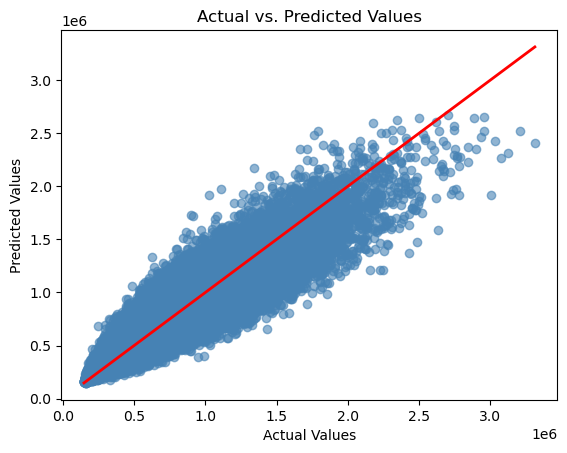

In [50]:
# 5. Plot Actual vs. Predicted
plt.scatter(y_test, predictions, color='steelblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Further Deep dive for the performance by segments

In [51]:
type(predictions), type(y_test)

(numpy.ndarray, pandas.core.series.Series)

In [52]:
df_predictions = pd.DataFrame(predictions, columns=['Prediction'])

In [53]:
# Sample Pandas Series
series = pd.Series(y_test, name='Actual')

# Convert Series to DataFrame
df_actual = series.to_frame()

In [54]:
df_predictions = df_predictions.reset_index(drop=True)
df_actual = df_actual.reset_index(drop=True)
df_X_test = X_test.reset_index(drop=True)

In [55]:
df_combined = pd.merge(df_predictions, df_actual, left_index=True, right_index=True)
df_combined = pd.merge(df_combined, df_X_test, left_index=True, right_index=True)

In [56]:
df_combined['diff'] = df_combined['Prediction'] - df_combined['Actual']

In [57]:
df_combined['ratio'] = df_combined['Prediction']/df_combined['Actual']

In [58]:
# features =[ 'bedrooms', 'bathrooms', 'rooms', 'squareFootage', 'lotSize', 'yearBuilt', 'lastSaleAmount','last_sale_year', 'month_delta_since_last_transaction']

In [59]:
# features

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\294532043.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_by_bin = df_combined.groupby('Bins')['diff'].mean()
C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\294532043.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_by_bin = df_combined.groupby('Bins')['diff'].mean()
C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\294532043.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

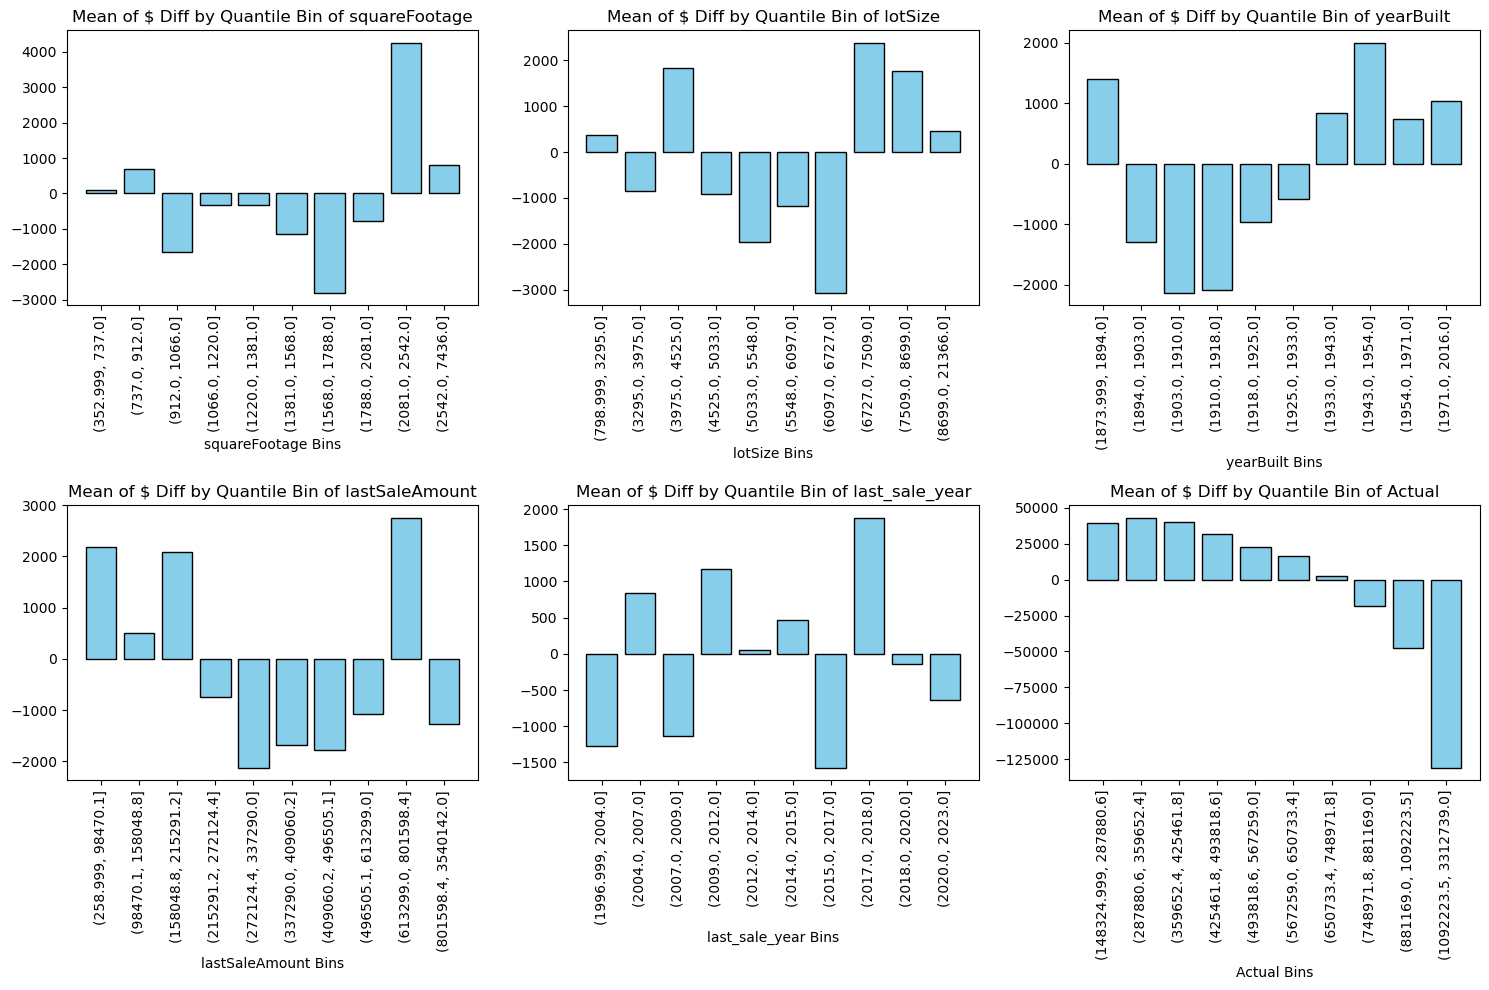

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()
# Plot each feature on a subplot, by 10 bins by default
for i, col in enumerate(['squareFootage', 'lotSize', 'yearBuilt', 'lastSaleAmount','last_sale_year', 'Actual']):
#     print(i, col)
    bin_feature = col
    df_combined['Bins'] = pd.qcut(df_combined[bin_feature], q=10)
    values_by_bin = df_combined.groupby('Bins')['diff'].mean()
    values_by_bin = values_by_bin.reset_index()
    values_by_bin['Bins'] = values_by_bin['Bins'].astype(str)
    axes[i].bar(values_by_bin['Bins'], values_by_bin['diff'],  color='skyblue', edgecolor='black')
    axes[i].set_title(f'Mean of $ Diff by Quantile Bin of {bin_feature}')
    axes[i].set_xlabel(f'{col} Bins')
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\862326903.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_by_bin = df_combined.groupby('Bins')['ratio'].mean()
C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\862326903.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_by_bin = df_combined.groupby('Bins')['ratio'].mean()
C:\Users\itsht\AppData\Local\Temp\ipykernel_13296\862326903.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defa

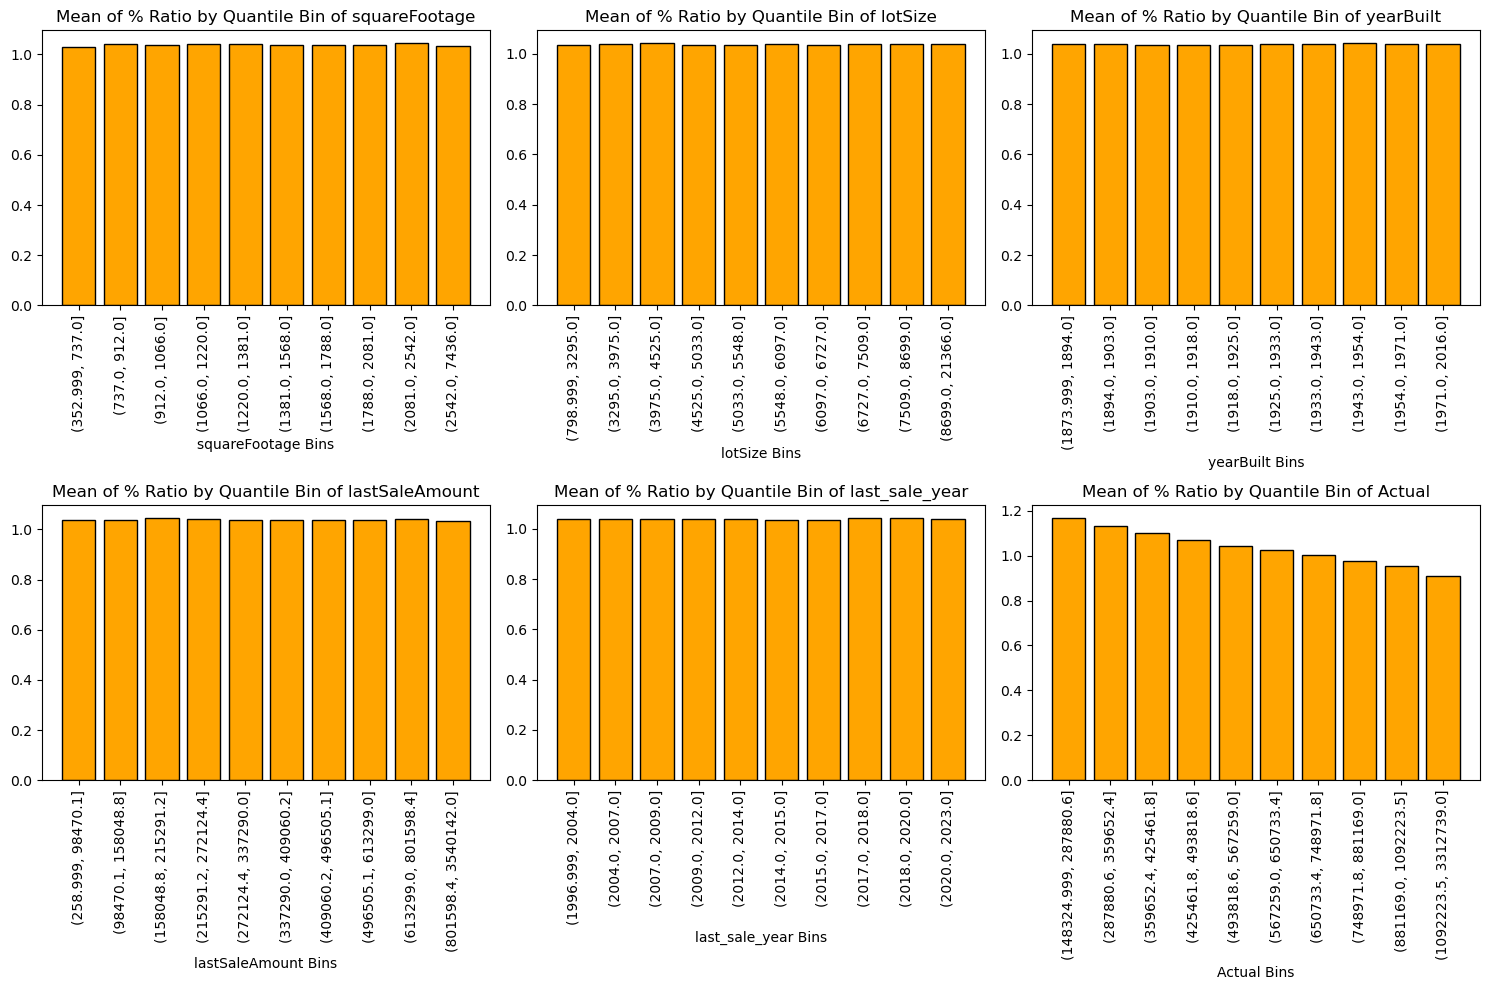

In [61]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()
# Plot each feature on a subplot, by 10 bins by default
for i, col in enumerate(['squareFootage', 'lotSize', 'yearBuilt', 'lastSaleAmount','last_sale_year', 'Actual']):
#     print(i, col)
    bin_feature = col
    df_combined['Bins'] = pd.qcut(df_combined[bin_feature], q=10)
    values_by_bin = df_combined.groupby('Bins')['ratio'].mean()
    values_by_bin = values_by_bin.reset_index()
    values_by_bin['Bins'] = values_by_bin['Bins'].astype(str)
    axes[i].bar(values_by_bin['Bins'], values_by_bin['ratio'],  color='orange', edgecolor='black')
    axes[i].set_title(f'Mean of % Ratio by Quantile Bin of {bin_feature}')
    axes[i].set_xlabel(f'{col} Bins')
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

In [62]:
from sklearn.inspection import PartialDependenceDisplay

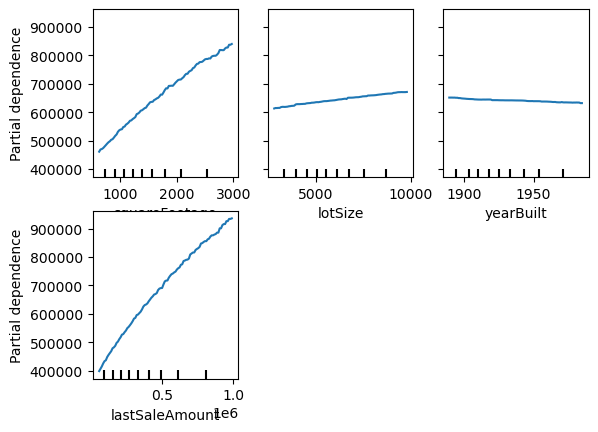

In [63]:
# Plot Partial Dependence Plots (PDP) for key variables

disp = PartialDependenceDisplay.from_estimator(
    xgb_reg, 
    X_train, 
    features=['squareFootage', 'lotSize', 'yearBuilt', 'lastSaleAmount'], 
    kind='average',  
    subsample=1000,  # Use a random sample of 100 points
    n_jobs=-1, 
    grid_resolution=100
)



## END